# Etapa 2: Análisis exploratorio de los datos

<p align="justify"> En esta segunda etapa se realizará una exploración de los datos procesados en la etapa anterior. La exploración irá acompañada de visualizaciones y tablas que ayuden a describir las diferentes variables y a su análisis. El análisis detallado de la supervivencia se realizará en próximas etapas.

In [4]:
# Montamos la unidad de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/TFM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TFM


In [5]:
!pip install tableone
!pip install pingouin

In [6]:
# Importamos módulos necesarios.
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from tableone import TableOne

from utils import read_data

# Aplicamos configuración sobre la visualización de los DataFrames.
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme()

# Ruta de los archivos de origen.
input_path = 'data/processed/'

In [7]:
# Carga de todos los datos.
demographic = read_data(f'{input_path}demographic.csv')
diagnosis_prior = read_data(f'{input_path}diagnosis_prior.csv')
diagnosis_primary = read_data(f'{input_path}diagnosis_primary.csv')
diagnosis_other = read_data(f'{input_path}diagnosis_other.csv')
diagnosis_type = read_data(f'{input_path}diagnosis_type.csv')
treatment_ebrt = read_data(f'{input_path}treatment_ebrt.csv')
treatment_chemo = read_data(f'{input_path}treatment_chemo.csv')
treatment_type = read_data(f'{input_path}treatment_type.csv')
mutation_gene = read_data(f'{input_path}mutation_gene.csv')

## 1. Análisis exploratorio de demographic

<p align="justify">Se inicia el análisis con los datos demográficos. A través de visualizaciones y tablas se observa la distribución de los datos y se decriben las variables.

In [8]:
# Muestra de los datos.
demographic.head()

,Patient Id,Age,Country Of Residence,Ethnicity,Gender,Race,Diabetes,Chronic Pancreatitis,Alcohol History,Alcohol Intensity,Tobacco Smoking Status,Relative With Cancer,Relative Cancer Type,Vital Status,Overall Survival
0,TCGA-IB-7897,53,Canada,not hispanic or latino,female,white,No,No,Yes,Social Drinker,"Current Reformed Smoker, Duration Not Specified",yes,Melanoma,1,486
1,TCGA-HZ-8315,54,United States,not hispanic or latino,female,white,No,No,NaN,NaN,NaN,NaN,NaN,1,299
2,TCGA-HZ-8636,58,United States,not hispanic or latino,female,white,No,No,NaN,NaN,NaN,NaN,NaN,1,545
3,TCGA-IB-7888,66,Canada,not hispanic or latino,female,black or african american,No,No,NaN,NaN,NaN,NaN,NaN,1,1332
4,TCGA-IB-7893,64,Canada,not hispanic or latino,male,white,Yes,No,Yes,Social Drinker,Current Reformed Smoker for > 15 yrs,yes,Cancer,1,117


## 1.1 Datos demográficos

<p align="justify">

In [71]:
df = demographic.copy()
df['Vital Status'] = df['Vital Status'].replace({0: 'Dead', 1: 'Alive'})

columns = ['Age', 'Gender', 'Ethnicity', 'Race', 'Country Of Residence',
           'Vital Status', 'Overall Survival']
continuous = ['Age', 'Overall Survival']

table_demographic = TableOne(df, columns=columns, continuous=continuous,
                             pval=False, missing=False, nonnormal=['Age', 'Overall Survival'])

print(table_demographic.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═══════════════════════════╤═════════════════════╕
│                                  │                           │ Overall             │
╞══════════════════════════════════╪═══════════════════════════╪═════════════════════╡
│ n                                │                           │ 185                 │
├──────────────────────────────────┼───────────────────────────┼─────────────────────┤
│ Age, median [Q1,Q3]              │                           │ 65.0 [57.0,73.0]    │
├──────────────────────────────────┼───────────────────────────┼─────────────────────┤
│ Gender, n (%)                    │ female                    │ 83 (44.9)           │
├──────────────────────────────────┼───────────────────────────┼─────────────────────┤
│                                  │ male                      │ 102 (55.1)          │
├──────────────────────────────────┼───────────────────────────┼─────────────────────┤
│ Ethnicity, n (%)                 │ None  

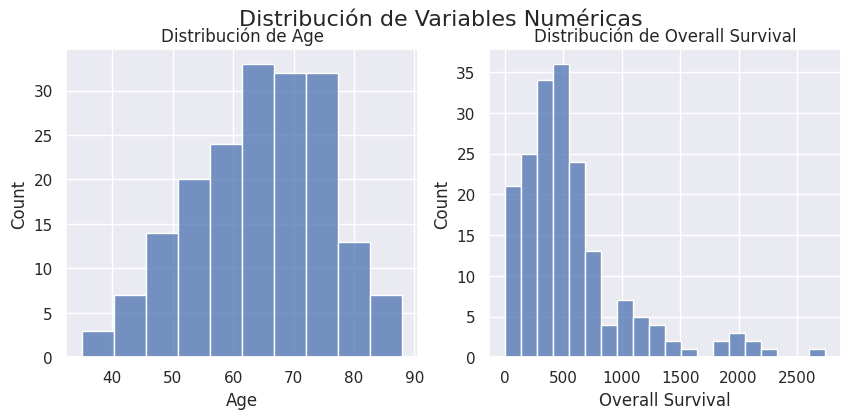

In [13]:
numeric_cols = ['Age', 'Overall Survival']

fig, ax = plt.subplots(1, len(numeric_cols), figsize=(10, 4))

for i in range(len(numeric_cols)):
    col = numeric_cols[i]
    sns.histplot(data=demographic, x=col, ax=ax[i])
    ax[i].set_title(f'Distribución de {col}')

plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

## 1.2 Datos de comorbilidades

<p align="justify">

In [72]:
columns = ['Diabetes', 'Chronic Pancreatitis']

table_comorbidities = TableOne(demographic, columns=columns, pval=False,
                               missing=False)

print(table_comorbidities.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════════╤═════╤════════════╕
│                             │     │ Overall    │
╞═════════════════════════════╪═════╪════════════╡
│ n                           │     │ 185        │
├─────────────────────────────┼─────┼────────────┤
│ Diabetes, n (%)             │ No  │ 147 (79.5) │
├─────────────────────────────┼─────┼────────────┤
│                             │ Yes │ 38 (20.5)  │
├─────────────────────────────┼─────┼────────────┤
│ Chronic Pancreatitis, n (%) │ No  │ 172 (93.0) │
├─────────────────────────────┼─────┼────────────┤
│                             │ Yes │ 13 (7.0)   │
╘═════════════════════════════╧═════╧════════════╛


## 1.3 Datos de antecedentes familiares

<p align="justify">

In [73]:
columns = ['Relative With Cancer',	'Relative Cancer Type']

table_family = TableOne(demographic, columns=columns, pval=False,
                        missing=False)

print(table_family.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════════╤═════════════════╤════════════╕
│                             │                 │ Overall    │
╞═════════════════════════════╪═════════════════╪════════════╡
│ n                           │                 │ 185        │
├─────────────────────────────┼─────────────────┼────────────┤
│ Relative With Cancer, n (%) │ None            │ 72 (38.9)  │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ no              │ 47 (25.4)  │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ yes             │ 66 (35.7)  │
├─────────────────────────────┼─────────────────┼────────────┤
│ Relative Cancer Type, n (%) │ Breast Cancer   │ 6 (3.2)    │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ Cancer          │ 44 (23.8)  │
├─────────────────────────────┼─────────────────┼────────────┤
│                             │ Melanoma        │ 2 (1.

## 1.4 Datos de exposición a sustancias

<p align="justify">

In [76]:
demographic['Alcohol Intensity'].unique()

array(['Social Drinker', 'None', 'Non-Drinker', 'Heavy Drinker',
       'Drinker', 'Occasional Drinker'], dtype=object)

In [75]:
columns = ['Alcohol History', 'Alcohol Intensity', 'Tobacco Smoking Status']

table_exposure = TableOne(demographic, columns=columns, pval=False,
                          missing=False)

print(table_exposure.tabulate(tablefmt="fancy_grid"))

╒═══════════════════════════════╤═════════════════════════════════════════════════╤═══════════╕
│                               │                                                 │ Overall   │
╞═══════════════════════════════╪═════════════════════════════════════════════════╪═══════════╡
│ n                             │                                                 │ 185       │
├───────────────────────────────┼─────────────────────────────────────────────────┼───────────┤
│ Alcohol History, n (%)        │ No                                              │ 29 (15.7) │
├───────────────────────────────┼─────────────────────────────────────────────────┼───────────┤
│                               │ None                                            │ 86 (46.5) │
├───────────────────────────────┼─────────────────────────────────────────────────┼───────────┤
│                               │ Yes                                             │ 70 (37.8) │
├───────────────────────────────┼───────

## 2. Análisis exploratorio de diagnosis_prior

In [14]:
# Muestra de los datos.
diagnosis_prior.head()

,Patient Id,Primary Diagnosis,Tissue Or Organ Of Origin
0,TCGA-HZ-7289,Carcinoma,Skin
1,TCGA-F2-A44G,Infiltrating Duct Carcinoma,Breast
2,TCGA-3A-A9IL,Adenoma,Pituitary Gland
3,TCGA-3A-A9IL,Melanoma,Lower Limb
4,TCGA-IB-A5SS,Basal Cell Carcinoma,Skin


In [82]:
columns = ['Primary Diagnosis', 'Tissue Or Organ Of Origin']

table_diagnosis_prior = TableOne(diagnosis_prior, columns=columns,
                                 pval=False, missing=False)

print(table_diagnosis_prior.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═══════════════════════════════════════╤═══════════╕
│                                  │                                       │ Overall   │
╞══════════════════════════════════╪═══════════════════════════════════════╪═══════════╡
│ n                                │                                       │ 23        │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│ Primary Diagnosis, n (%)         │ Adenocarcinoma                        │ 2 (8.7)   │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│                                  │ Adenoma                               │ 1 (4.3)   │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│                                  │ Basal Cell Carcinoma                  │ 3 (13.0)  │
├──────────────────────────────────┼───────────────────────────────────────┼───────────┤
│                    

## 3. Análisis exploratorio de diagnosis_primary

In [18]:
# Muestra de los datos.
diagnosis_primary.head()

,Patient Id,Ajcc Pathologic Stage,Ajcc Pathologic T,Ajcc Pathologic N,Ajcc Pathologic M,Primary Diagnosis,Residual Disease,Sites Of Involvement,Tumor Grade,Year Of Diagnosis,Lymph Nodes Positive,Maximum Tumor Diameter (cm),Ajcc Pathologic N 8th,Ajcc Pathologic T 8th,Ajcc Pathologic Stage 8th,Gene Mutations
0,TCGA-IB-7897,Stage II,T3,N1,M0,Infiltrating Duct Carcinoma,R0,Pancreas Head,G2,2008.0,2.0,3.5,N1,T2,Stage II,NaN
1,TCGA-HZ-8315,Stage II,T3,N0,MX,Infiltrating Duct Carcinoma,R1,Pancreas Head,G2,2012.0,0.0,6.0,N0,T3,Stage II,NaN
2,TCGA-HZ-8636,Stage IV,T3,N0,M1,Infiltrating Duct Carcinoma,R1,Pancreas Tail,G3,2012.0,0.0,9.0,N0,T3,Stage IV,NaN
3,TCGA-IB-7888,Stage II,T3,N0,M0,Infiltrating Duct Carcinoma,R0,Pancreas Head,G2,2008.0,0.0,3.0,N0,T2,Stage I,NaN
4,TCGA-IB-7893,Stage II,T3,N0,M0,Infiltrating Duct Carcinoma,R0,Pancreas Body,G3,2009.0,0.0,7.0,N0,T3,Stage II,NaN


In [115]:
columns = ['Ajcc Pathologic Stage', 'Ajcc Pathologic T', 'Ajcc Pathologic N',
           'Ajcc Pathologic M']

table_diagnosis_primary1 = TableOne(diagnosis_primary, columns=columns,
                                   pval=False, missing=False)

print(table_diagnosis_primary1.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════╤═══════════╤════════════╕
│                              │           │ Overall    │
╞══════════════════════════════╪═══════════╪════════════╡
│ n                            │           │ 185        │
├──────────────────────────────┼───────────┼────────────┤
│ Ajcc Pathologic Stage, n (%) │ None      │ 4 (2.2)    │
├──────────────────────────────┼───────────┼────────────┤
│                              │ Stage I   │ 20 (10.8)  │
├──────────────────────────────┼───────────┼────────────┤
│                              │ Stage II  │ 152 (82.2) │
├──────────────────────────────┼───────────┼────────────┤
│                              │ Stage III │ 4 (2.2)    │
├──────────────────────────────┼───────────┼────────────┤
│                              │ Stage IV  │ 5 (2.7)    │
├──────────────────────────────┼───────────┼────────────┤
│ Ajcc Pathologic T, n (%)     │ None      │ 1 (0.5)    │
├──────────────────────────────┼───────────┼────────────┤
│             

In [118]:
columns = ['Ajcc Pathologic Stage 8th', 'Ajcc Pathologic T 8th', 'Ajcc Pathologic N 8th']

table_diagnosis_primary2 = TableOne(diagnosis_primary, columns=columns,
                                   pval=False, missing=False)

print(table_diagnosis_primary2.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═══════════╤════════════╕
│                                  │           │ Overall    │
╞══════════════════════════════════╪═══════════╪════════════╡
│ n                                │           │ 185        │
├──────────────────────────────────┼───────────┼────────────┤
│ Ajcc Pathologic Stage 8th, n (%) │ Stage I   │ 34 (18.4)  │
├──────────────────────────────────┼───────────┼────────────┤
│                                  │ Stage II  │ 89 (48.1)  │
├──────────────────────────────────┼───────────┼────────────┤
│                                  │ Stage III │ 57 (30.8)  │
├──────────────────────────────────┼───────────┼────────────┤
│                                  │ Stage IV  │ 5 (2.7)    │
├──────────────────────────────────┼───────────┼────────────┤
│ Ajcc Pathologic T 8th, n (%)     │ T1        │ 12 (6.5)   │
├──────────────────────────────────┼───────────┼────────────┤
│                                  │ T2        │ 101 (54.6) │
├───────

In [116]:
columns = ['Residual Disease', 'Tumor Grade']

table_diagnosis_primary3 = TableOne(diagnosis_primary, columns=columns,
                                   pval=False, missing=False)

print(table_diagnosis_primary3.tabulate(tablefmt="fancy_grid"))

╒═════════════════════════╤══════╤════════════╕
│                         │      │ Overall    │
╞═════════════════════════╪══════╪════════════╡
│ n                       │      │ 185        │
├─────────────────────────┼──────┼────────────┤
│ Residual Disease, n (%) │ None │ 12 (6.5)   │
├─────────────────────────┼──────┼────────────┤
│                         │ R0   │ 111 (60.0) │
├─────────────────────────┼──────┼────────────┤
│                         │ R1   │ 53 (28.6)  │
├─────────────────────────┼──────┼────────────┤
│                         │ R2   │ 5 (2.7)    │
├─────────────────────────┼──────┼────────────┤
│                         │ RX   │ 4 (2.2)    │
├─────────────────────────┼──────┼────────────┤
│ Tumor Grade, n (%)      │ G1   │ 32 (17.3)  │
├─────────────────────────┼──────┼────────────┤
│                         │ G2   │ 97 (52.4)  │
├─────────────────────────┼──────┼────────────┤
│                         │ G3   │ 51 (27.6)  │
├─────────────────────────┼──────┼──────

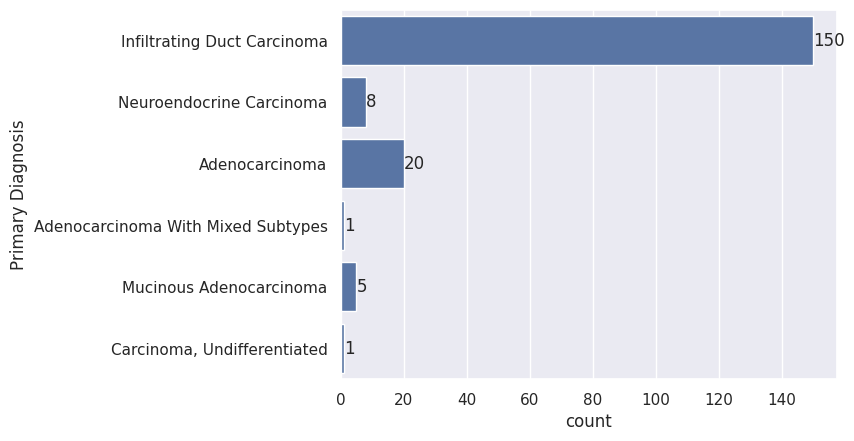

In [111]:
ax = sns.countplot(data=diagnosis_primary, y='Primary Diagnosis')
ax.bar_label(ax.containers[0])
plt.show()

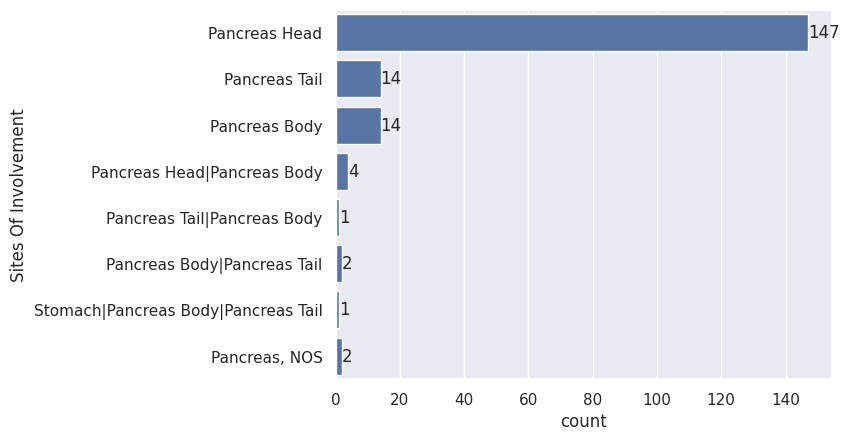

In [113]:
ax = sns.countplot(data=diagnosis_primary, y='Sites Of Involvement')
ax.bar_label(ax.containers[0])
plt.show()

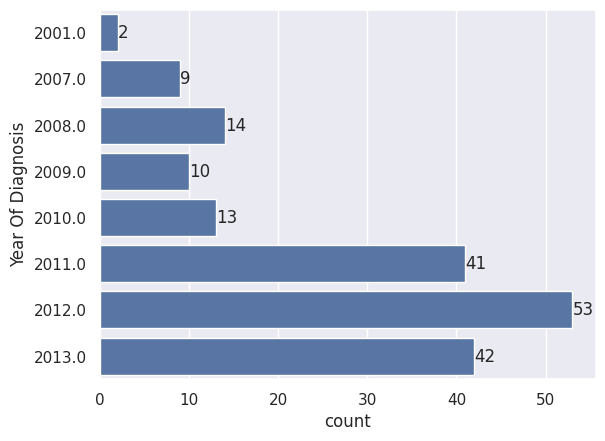

In [108]:
ax = sns.countplot(data=diagnosis_primary, y='Year Of Diagnosis')
ax.bar_label(ax.containers[0])
plt.show()

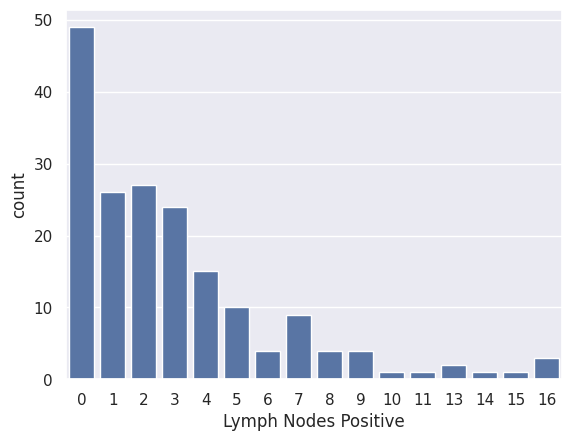

In [104]:
sns.countplot(data=diagnosis_primary, x='Lymph Nodes Positive')
labels = [0, 1, 2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10, 11, 13, 14, 15, 16]
plt.xticks(labels=labels, ticks=range(16))
plt.show()

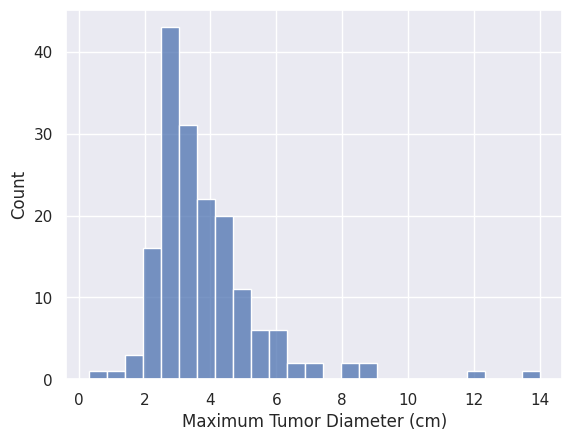

In [105]:
sns.histplot(data=diagnosis_primary, x='Maximum Tumor Diameter (cm)')
plt.show()

In [23]:
df_etapas = diagnosis_primary[['Ajcc Pathologic Stage', 'Ajcc Pathologic Stage 8th']].copy()

df_etapas['Stage_7th'] = df_etapas['Ajcc Pathologic Stage'].astype(str) + ' (7th Ed.)'
df_etapas['Stage_8th'] = df_etapas['Ajcc Pathologic Stage 8th'].astype(str) + ' (8th Ed.)'

df_flujo = df_etapas.groupby(['Stage_7th', 'Stage_8th']).size().reset_index(name='Value')
df_flujo.rename(columns={'Stage_7th': 'Source', 'Stage_8th': 'Target'}, inplace=True)

all_nodes = list(pd.concat([df_flujo['Source'], df_flujo['Target']]).unique())

node_map = {name: i for i, name in enumerate(all_nodes)}

source_indices = df_flujo['Source'].map(node_map).tolist()
target_indices = df_flujo['Target'].map(node_map).tolist()
values = df_flujo['Value'].tolist()

totales_source = df_flujo.groupby('Source')['Value'].sum()
totales_target = df_flujo.groupby('Target')['Value'].sum()
totales = totales_source.add(totales_target, fill_value=0)

node_labels = [
    f"{name.replace(' (7th Ed.)','').replace(' (8th Ed.)','')}\n(n={int(totales.get(name, 0))})"
    for name in all_nodes]

fig = go.Figure(data=[go.Sankey(node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
                                          label=node_labels, hovertemplate='Nodo: %{label}<extra></extra>'),
                                link=dict(source=source_indices, target=target_indices, value=values,
                                          hovertemplate='Flujo: %{source.label} -> %{target.label}<br>Pacientes: %{value}<extra></extra>'))])

fig.update_layout(title_text="Reclasificación de Estadios Patológicos (7ª Edición a 8ª Edición)",
    font=dict(size=10, color='black'), width=800, height=600,
    annotations=[dict(xref='paper', yref='paper', x=0.05, y=1.05, text='Estadios - 7ª Edición',
                      showarrow=False, font=dict(size=12, color='blue')),
        dict(xref='paper', yref='paper', x=0.95, y=1.05, text='Estadios - 8ª Edición',
            showarrow=False,font=dict(size=12, color='red'))])

fig.show()

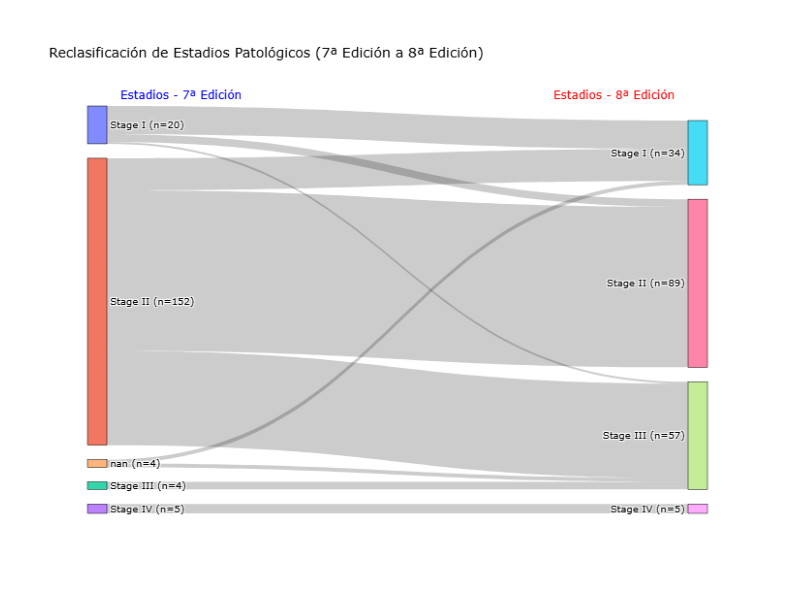

In [121]:
im = plt.imread('images/Estadios patologicos.png', format='png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.axis('off')
plt.show()

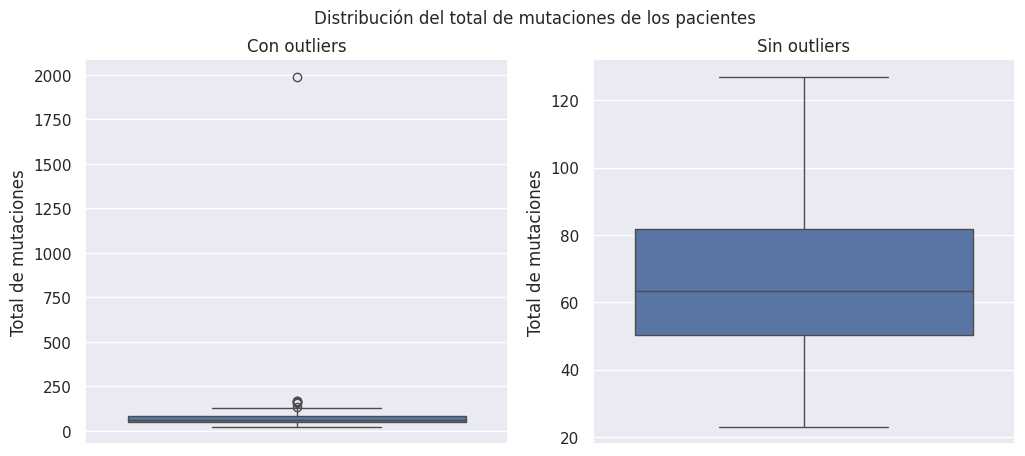

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=diagnosis_primary, y='Gene Mutations', ax=ax[0])
sns.boxplot(data=diagnosis_primary, y='Gene Mutations', ax=ax[1], showfliers=False)

ax[0].set_title('Con outliers')
ax[0].set_ylabel('Total de mutaciones')

ax[1].set_title('Sin outliers')
ax[1].set_ylabel('Total de mutaciones')

plt.suptitle('Distribución del total de mutaciones de los pacientes', fontsize=12)

plt.show()

## 4. Análisis exploratorio de diagnosis_other

In [127]:
# Muestra de los datos.
diagnosis_other.head(10)

,Patient Id,Diagnosis Type,Tissue Or Organ Of Origin
0,TCGA-IB-7897,metastasis,Liver
1,TCGA-IB-7897,recurrence,Liver
2,TCGA-IB-7888,metastasis,Retroperitoneum
3,TCGA-IB-7893,metastasis,Peritoneum
4,TCGA-US-A774,metastasis,Liver
5,TCGA-IB-8127,recurrence,Pancreas
6,TCGA-IB-8127,metastasis,Liver
7,TCGA-2J-AABU,metastasis,Liver
8,TCGA-HV-AA8V,metastasis,Bone
9,TCGA-3A-A9IH,metastasis,Lung


In [129]:
columns = ['Tissue Or Organ Of Origin']
df = diagnosis_other[diagnosis_other['Diagnosis Type'].isin(['metastasis', 'recurrence'])].copy()

table_diagnosis_other = TableOne(df, columns=columns, groupby='Diagnosis Type',
                                pval=False, missing=False)

print(table_diagnosis_other.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═════════════════════════════════════════════════╤═══════════╤══════════════╤══════════════╕
│                                  │                                                 │ Overall   │ metastasis   │ recurrence   │
╞══════════════════════════════════╪═════════════════════════════════════════════════╪═══════════╪══════════════╪══════════════╡
│ n                                │                                                 │ 95        │ 70           │ 25           │
├──────────────────────────────────┼─────────────────────────────────────────────────┼───────────┼──────────────┼──────────────┤
│ Tissue Or Organ Of Origin, n (%) │ Abdomen                                         │ 3 (3.2)   │ 1 (1.4)      │ 2 (8.0)      │
├──────────────────────────────────┼─────────────────────────────────────────────────┼───────────┼──────────────┼──────────────┤
│                                  │ Adrenal Gland                                   │ 1 (1.1)   

In [128]:
columns = ['Tissue Or Organ Of Origin']
df = diagnosis_other[diagnosis_other['Diagnosis Type'] == 'Subsequent Primary'].copy()

table_diagnosis_other2 = TableOne(df, columns=columns,
                                pval=False, missing=False)

print(table_diagnosis_other2.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════╤═════════════════════════════════╤═══════════╕
│                                  │                                 │ Overall   │
╞══════════════════════════════════╪═════════════════════════════════╪═══════════╡
│ n                                │                                 │ 3         │
├──────────────────────────────────┼─────────────────────────────────┼───────────┤
│ Tissue Or Organ Of Origin, n (%) │ Colon                           │ 1 (33.3)  │
├──────────────────────────────────┼─────────────────────────────────┼───────────┤
│                                  │ Lung                            │ 1 (33.3)  │
├──────────────────────────────────┼─────────────────────────────────┼───────────┤
│                                  │ Skin Of Upper Limb And Shoulder │ 1 (33.3)  │
╘══════════════════════════════════╧═════════════════════════════════╧═══════════╛


## 5. Análisis exploratorio de diagnosis_type

In [32]:
# Muestra de los datos.
diagnosis_type.head()

,Patient Id,Prior Primary,Primary,Recurrence,Metastasis,Subsequent Primary,Total
0,TCGA-IB-7897,No,Yes,Yes,Yes,No,3
1,TCGA-HZ-8315,No,Yes,No,No,No,1
2,TCGA-HZ-8636,No,Yes,No,No,No,1
3,TCGA-IB-7888,No,Yes,No,Yes,No,2
4,TCGA-IB-7893,No,Yes,No,Yes,No,2


In [131]:
columns = ['Total']

table_diagnosis_type = TableOne(diagnosis_type, columns=columns,
                                categorical=columns,
                                pval=False, missing=False)

print(table_diagnosis_type.tabulate(tablefmt="fancy_grid"))

╒══════════════╤════╤═══════════╕
│              │    │ Overall   │
╞══════════════╪════╪═══════════╡
│ n            │    │ 185       │
├──────────────┼────┼───────────┤
│ Total, n (%) │ 1  │ 88 (47.6) │
├──────────────┼────┼───────────┤
│              │ 2  │ 83 (44.9) │
├──────────────┼────┼───────────┤
│              │ 3  │ 14 (7.6)  │
╘══════════════╧════╧═══════════╛


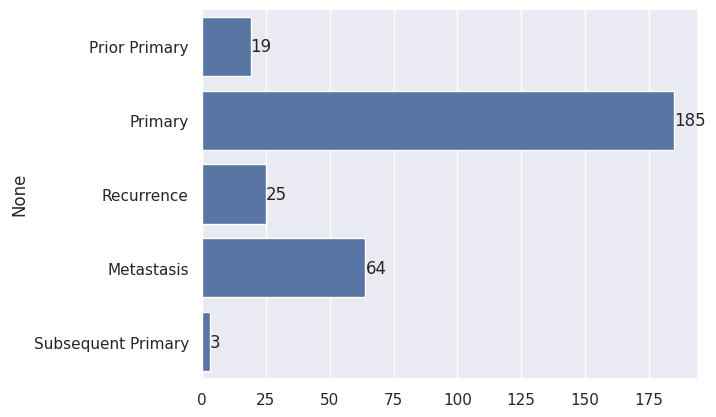

In [36]:
diagnosis_count = []
for col in diagnosis_type.columns[1:-1]:
      diagnosis_count.append(diagnosis_type[diagnosis_type[col] != 'No'].shape[0])

ax = sns.barplot(y=diagnosis_type.columns[1:-1], x=diagnosis_count)
ax.bar_label(ax.containers[0])
plt.show()

## 6. Análisis exploratorio de treatment_ebrt

In [136]:
# Muestra de los datos.
treatment_ebrt['Outcome'] = pd.Categorical(treatment_ebrt['Outcome'],
                                            categories=['Progressive Disease',
                                                        'Stable Disease',
                                                        'Complete Response'],
                                            ordered=True)

treatment_ebrt.head()

,Patient Id,Treatment Duration,Number Of Fractions,Treatment Anatomic Sites,Treatment Dose (cGy),Outcome
0,TCGA-FB-AAPP,166.0,25.0,Primary Tumor Field,4500.0,Progressive Disease
1,TCGA-HZ-7289,467.0,NaN,Distant Site,4500.0,Progressive Disease
2,TCGA-HZ-7920,120.0,28.0,Primary Tumor Field,5040.0,Complete Response
3,TCGA-F2-A44G,144.0,28.0,Primary Tumor Field,5440.0,Complete Response
4,TCGA-HZ-A49I,93.0,25.0,Primary Tumor Field,5040.0,Progressive Disease


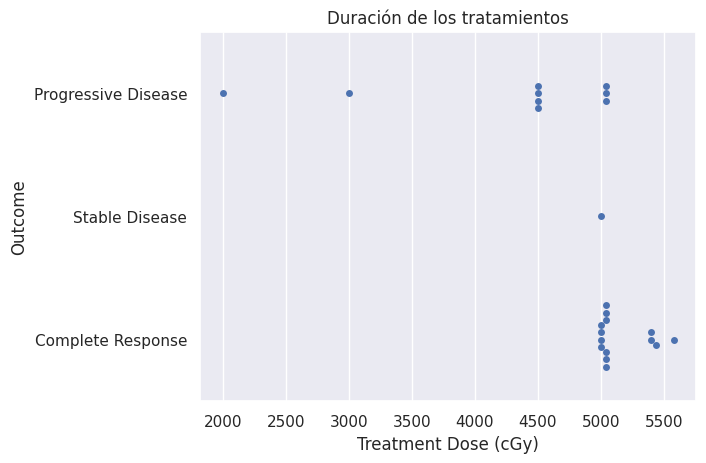

In [41]:
sns.swarmplot(data=treatment_ebrt, x='Treatment Dose (cGy)', y='Outcome')

plt.title('Duración de los tratamientos')

plt.show()

In [42]:
columns = ['Outcome']

table_treatment_ebrt = TableOne(treatment_ebrt, columns=columns,
                                categorical=columns, pval=False,
                                missing=False)

print(table_treatment_ebrt.tabulate(tablefmt="fancy_grid"))

╒════════════════╤═════════════════════╤═══════════╕
│                │                     │ Overall   │
╞════════════════╪═════════════════════╪═══════════╡
│ n              │                     │ 41        │
├────────────────┼─────────────────────┼───────────┤
│ Outcome, n (%) │ Progressive Disease │ 10 (24.4) │
├────────────────┼─────────────────────┼───────────┤
│                │ Stable Disease      │ 2 (4.9)   │
├────────────────┼─────────────────────┼───────────┤
│                │ Complete Response   │ 14 (34.1) │
├────────────────┼─────────────────────┼───────────┤
│                │ None                │ 15 (36.6) │
╘════════════════╧═════════════════════╧═══════════╛


## 7. Análisis exploratorio de treatment_chemo

In [137]:
# Muestra de los datos.
treatment_chemo['Outcome'] = pd.Categorical(treatment_chemo['Outcome'],
                                            categories=['Treatment Ongoing',
                                                        'Progressive Disease',
                                                        'Stable Disease',
                                                        'Partial Response',
                                                        'Complete Response'],
                                            ordered=True)

treatment_chemo.head()

,Patient Id,Outcome,Treatment Duration,Agents,Treatment Type,Year Of Diagnosis
0,TCGA-2L-AAQA,Progressive Disease,126.0,Gemcitabine,Monotherapy,2010.0
1,TCGA-2L-AAQE,Progressive Disease,NaN,Gemcitabine,Monotherapy,2011.0
2,TCGA-2L-AAQI,Progressive Disease,72.0,Gemcitabine,Monotherapy,2011.0
3,TCGA-2L-AAQJ,Progressive Disease,171.0,Gemcitabine,Monotherapy,2010.0
4,TCGA-3A-A9I5,Complete Response,211.0,Fluorouracil Leucovorin Gemcitabine,Combination,2009.0


In [48]:
year = diagnosis_primary[['Patient Id', 'Year Of Diagnosis']].copy()
treatment_chemo = treatment_chemo.merge(year, on='Patient Id', how='left')

Text(0.5, 1.0, 'Distribución de resultados de tratamiento')

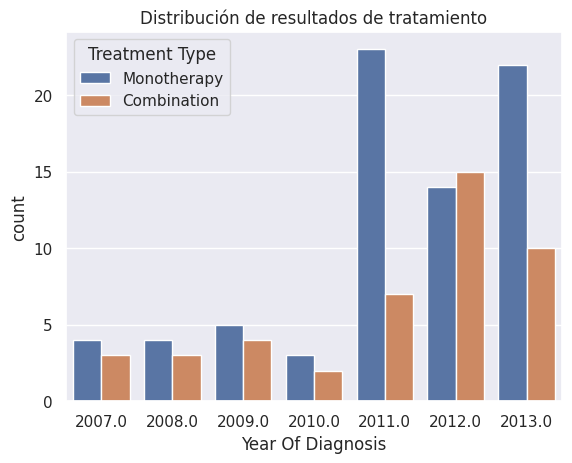

In [142]:
sns.countplot(data=treatment_chemo, x='Year Of Diagnosis', hue='Treatment Type')

plt.title('Distribución de resultados de tratamiento')

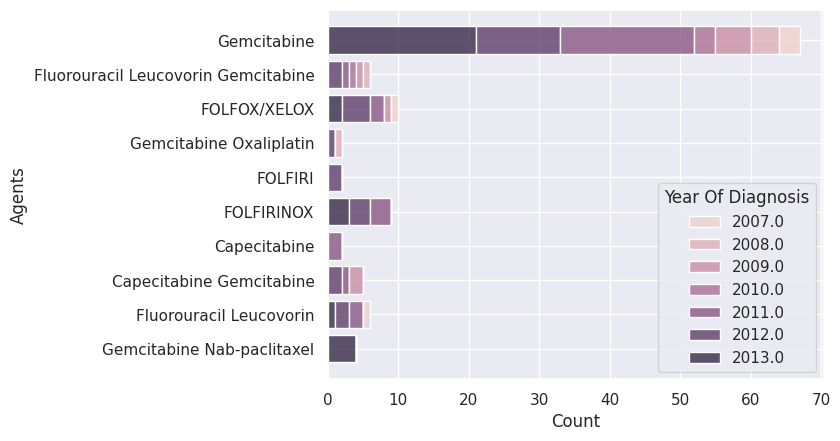

,Year Of Diagnosis
Agents,
Capecitabine,2011.0
Capecitabine Gemcitabine,2009.0
FOLFIRI,2012.0
FOLFIRINOX,2011.0
FOLFOX/XELOX,2007.0
Fluorouracil Leucovorin,2007.0
Fluorouracil Leucovorin Gemcitabine,2008.0
Gemcitabine,2007.0
Gemcitabine Nab-paclitaxel,2013.0


In [153]:
frequent_agents = treatment_chemo['Agents'].value_counts()
frequent_agents = frequent_agents[frequent_agents > 1].index

df = treatment_chemo[treatment_chemo['Agents'].isin(frequent_agents)].copy()

sns.histplot(data=df, y='Agents', hue='Year Of Diagnosis', multiple='stack', shrink=0.8)
plt.show()

df.groupby(['Agents'])['Year Of Diagnosis'].min()


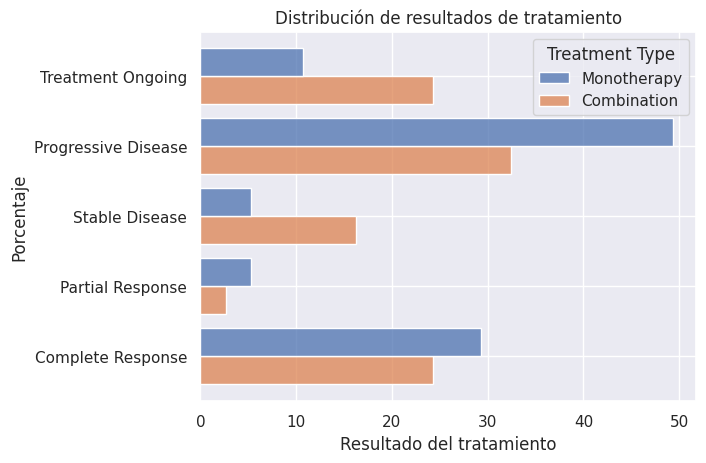

In [51]:
sns.histplot(data=treatment_chemo, y='Outcome', hue='Treatment Type',
             multiple='dodge', shrink=0.8, stat='percent', common_norm=False)


plt.title('Distribución de resultados de tratamiento')
plt.xlabel('Resultado del tratamiento')
plt.ylabel('Porcentaje')
plt.show()

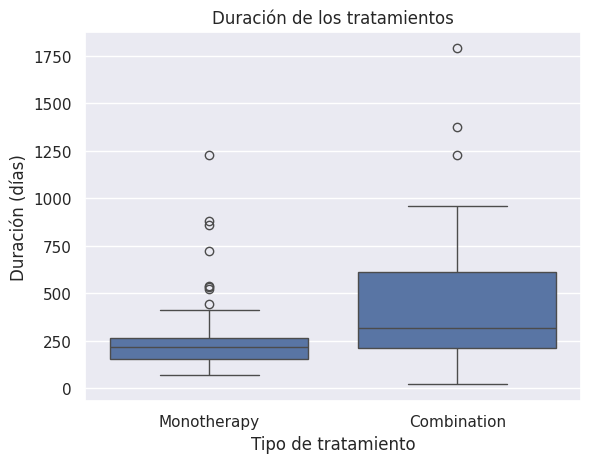

In [52]:
sns.boxplot(data=treatment_chemo, x='Treatment Type', y='Treatment Duration')

plt.title('Duración de los tratamientos')
plt.xlabel('Tipo de tratamiento')
plt.ylabel('Duración (días)')
plt.show()

## 8. Análisis exploratorio de treatment_type

In [53]:
# Muestra de los datos.
treatment_type.head()

,Patient Id,EBRT,Chemotherapy,Adjuvant,Pancreatectomy,Surgery,Pharmaceutical Therapy,Radiation Therapy,Whipple,Other,Total
0,TCGA-IB-7897,No,No,Pharmaceutical Radiation,No,Yes,Yes,Yes,Yes,No,5
1,TCGA-HZ-8315,No,No,Pharmaceutical Radiation,No,No,No,No,Yes,No,2
2,TCGA-HZ-8636,No,No,Pharmaceutical Radiation,No,Yes,No,No,No,No,2
3,TCGA-IB-7888,No,Yes,Radiation,No,Yes,Yes,Yes,Yes,No,6
4,TCGA-IB-7893,No,No,Pharmaceutical Radiation,Distal Pancreatectomy,Yes,Yes,Yes,No,No,5


In [54]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
treatment_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient Id              185 non-null    object
 1   EBRT                    185 non-null    object
 2   Chemotherapy            185 non-null    object
 3   Adjuvant                185 non-null    object
 4   Pancreatectomy          185 non-null    object
 5   Surgery                 185 non-null    object
 6   Pharmaceutical Therapy  185 non-null    object
 7   Radiation Therapy       185 non-null    object
 8   Whipple                 185 non-null    object
 9   Other                   185 non-null    object
 10  Total                   185 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 16.0+ KB


In [55]:
# Realizamos una descripción estadística básica de las variables.
treatment_type.describe(include='all')

,Patient Id,EBRT,Chemotherapy,Adjuvant,Pancreatectomy,Surgery,Pharmaceutical Therapy,Radiation Therapy,Whipple,Other,Total
count,185,185,185,185,185,185,185,185,185,185,185.000000
unique,185,2,2,4,3,2,2,2,2,4,NaN
top,TCGA-IB-7897,No,No,Radiation,No,Yes,Yes,Yes,Yes,No,NaN
freq,1,144,93,77,158,103,96,96,143,182,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.010811
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.638495
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


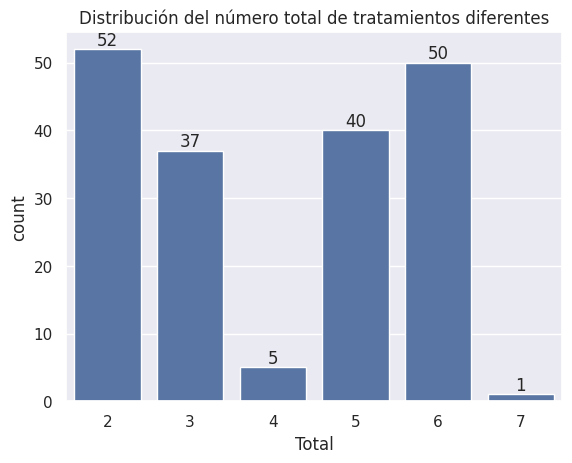

In [56]:
ax = sns.countplot(data=treatment_type, x='Total')
ax.bar_label(ax.containers[0])

plt.title('Distribución del número total de tratamientos diferentes')
plt.show()

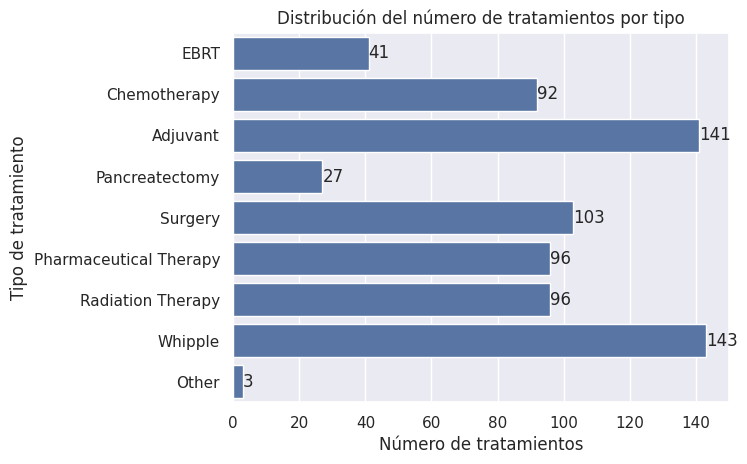

In [57]:
treatment_count = []
for col in treatment_type.columns[1:-1]:
      treatment_count.append(treatment_type[treatment_type[col] != 'No'].shape[0])

ax = sns.barplot(y=treatment_type.columns[1:-1], x=treatment_count)
ax.bar_label(ax.containers[0])

plt.xlabel('Número de tratamientos')
plt.ylabel('Tipo de tratamiento')
plt.title('Distribución del número de tratamientos por tipo')
plt.show()

In [58]:
columns = ['Adjuvant', 'Pancreatectomy', 'Other']

table_treatment_type = TableOne(treatment_type, columns=columns,
                                categorical=columns, pval=False,
                                missing=False)

print(table_treatment_type.tabulate(tablefmt="fancy_grid"))

╒═══════════════════════╤═════════════════════════════════════════════════════╤════════════╕
│                       │                                                     │ Overall    │
╞═══════════════════════╪═════════════════════════════════════════════════════╪════════════╡
│ n                     │                                                     │ 185        │
├───────────────────────┼─────────────────────────────────────────────────────┼────────────┤
│ Adjuvant, n (%)       │ No                                                  │ 44 (23.8)  │
├───────────────────────┼─────────────────────────────────────────────────────┼────────────┤
│                       │ Pharmaceutical                                      │ 1 (0.5)    │
├───────────────────────┼─────────────────────────────────────────────────────┼────────────┤
│                       │ Pharmaceutical Radiation                            │ 63 (34.1)  │
├───────────────────────┼─────────────────────────────────────────────

## 9. Análisis exploratorio de mutation

In [59]:
mutation_gene.set_index('Gene', inplace=True)
mutation_gene.head(10)

,TCGA-3A-A9IU,TCGA-IB-7651,TCGA-2L-AAQA,TCGA-2J-AABF,TCGA-H8-A6C1,TCGA-XN-A8T5,TCGA-LB-A8F3,TCGA-FZ-5919,TCGA-HV-A7OL,TCGA-2J-AAB4,TCGA-2L-AAQI,TCGA-FB-A78T,TCGA-HZ-8637,TCGA-HZ-A8P0,TCGA-RB-AA9M,TCGA-IB-AAUR,TCGA-Q3-AA2A,TCGA-FB-AAQ1,TCGA-IB-8126,TCGA-IB-AAUN,TCGA-US-A776,TCGA-YB-A89D,TCGA-2L-AAQJ,TCGA-FB-AAPU,TCGA-IB-A5SP,TCGA-RB-A7B8,TCGA-FB-AAQ0,TCGA-IB-A5SO,TCGA-HV-A7OP,TCGA-LB-A7SX,TCGA-LB-A9Q5,TCGA-YY-A8LH,TCGA-3A-A9IS,TCGA-XN-A8T3,TCGA-HZ-A8P1,TCGA-HV-AA8V,TCGA-2J-AAB1,TCGA-XD-AAUI,TCGA-2J-AAB9,TCGA-2J-AABH,TCGA-2J-AABP,TCGA-3A-A9I5,TCGA-FZ-5921,TCGA-HZ-A77P,TCGA-IB-A5ST,TCGA-IB-AAUU,TCGA-3A-A9J0,TCGA-2L-AAQE,TCGA-3A-A9I9,TCGA-2J-AABO,TCGA-FZ-5920,TCGA-FB-A5VM,TCGA-RL-AAAS,TCGA-FB-AAQ6,TCGA-HZ-A77Q,TCGA-FZ-5923,TCGA-2J-AABE,TCGA-3A-A9IJ,TCGA-3A-A9IZ,TCGA-3A-A9IH,TCGA-IB-7885,TCGA-FB-AAPZ,TCGA-YH-A8SY,TCGA-HZ-A9TJ,TCGA-US-A77J,TCGA-3A-A9IO,TCGA-HV-AA8X,TCGA-F2-A7TX,TCGA-2J-AABA,TCGA-3E-AAAY,TCGA-FZ-5922,TCGA-IB-A5SQ,TCGA-IB-A6UG,TCGA-OE-A75W,TCGA-3A-A9IB,TCGA-IB-A5SS,TCGA-US-A77G,TCGA-S4-A8RO,TCGA-IB-A7M4,TCGA-2J-AAB8,TCGA-2J-AABV,TCGA-XD-AAUG,TCGA-Z5-AAPL,TCGA-FB-AAPS,TCGA-2L-AAQM,TCGA-HZ-A77O,TCGA-FB-AAPP,TCGA-FB-AAQ2,TCGA-2L-AAQL,TCGA-IB-A7LX,TCGA-IB-AAUQ,TCGA-XD-AAUL,TCGA-2J-AABU,TCGA-US-A779,TCGA-2J-AABT,TCGA-IB-AAUS,TCGA-F2-7273,TCGA-FB-AAPQ,TCGA-IB-AAUO,TCGA-FZ-5926,TCGA-HZ-7925,TCGA-US-A77E,TCGA-IB-7652,TCGA-F2-A8YN,TCGA-3A-A9IC,TCGA-IB-AAUM,TCGA-HZ-7918,TCGA-Q3-A5QY,TCGA-IB-A6UF,TCGA-3A-A9IX,TCGA-IB-AAUW,TCGA-2J-AABR,TCGA-IB-AAUP,TCGA-3E-AAAZ,TCGA-XD-AAUH,TCGA-3A-A9IL,TCGA-2J-AABK,TCGA-3A-A9IV,TCGA-IB-AAUV,TCGA-2J-AAB6,TCGA-3A-A9I7,TCGA-HZ-A49I,TCGA-FB-AAQ3,TCGA-FZ-5924,TCGA-F2-A44G,TCGA-3A-A9IR,Total,Total %
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KRAS,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,100,79.365079
TP53,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,1,1,0,0,81,64.285714
TTN,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,44,34.920635
MAMLD1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,28,22.222222
CDKN2A,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,27,21.428571
SMAD4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,26,20.634921
FAM47C,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,16.666667
MAGEC1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,16.666667
TMC4,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,

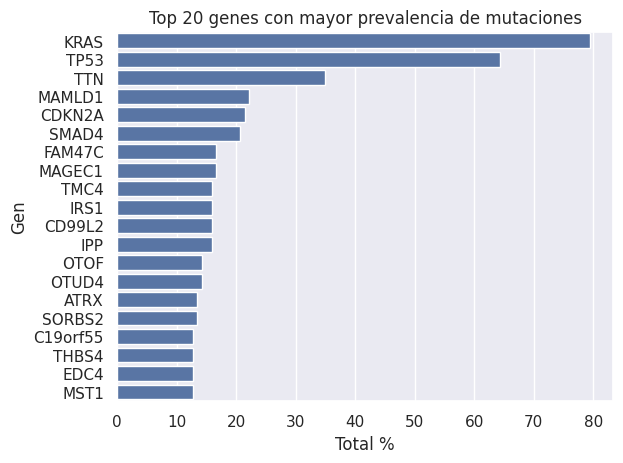

In [60]:
sns.barplot(data=mutation_gene.head(20), y='Gene', x='Total %')

plt.title('Top 20 genes con mayor prevalencia de mutaciones')
plt.ylabel('Gen')
plt.show()

In [61]:
def comutations(mutation):
    comutation = mutation_gene.loc[:, mutation_gene.loc[mutation] == 1]\
      .loc[mutation_gene.index != mutation, :]\
      .sum(axis=1) * 100 / mutation_gene.loc[mutation, 'Total']

    comutation = comutation.sort_values(ascending=False).head(20)
    comutation = pd.DataFrame(comutation)
    comutation.columns = ['Total_co %']
    comutation['Total'] = mutation_gene.loc[comutation.index, 'Total']

    sns.barplot(y=comutation.index, x=comutation['Total_co %'], alpha=0.8)
    sns.barplot(y=comutation.index, x=comutation['Total'], alpha=0.8)

    plt.title(f'Top 20 genes con co-mutaciones con {mutation}')
    plt.ylabel('Gen')
    plt.xlabel('Total % de co-mutaciones')
    plt.show()

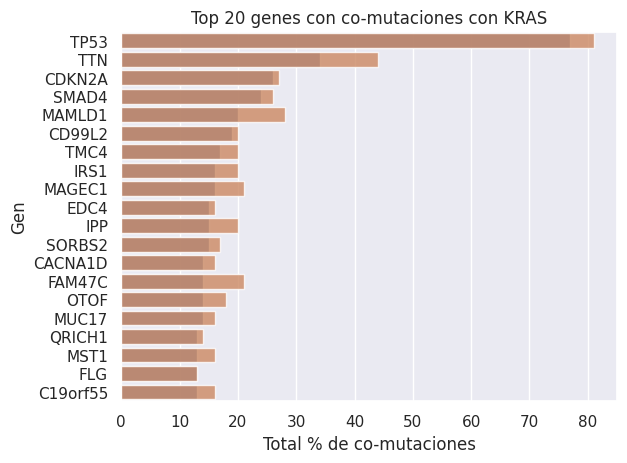

In [62]:
comutations('KRAS')

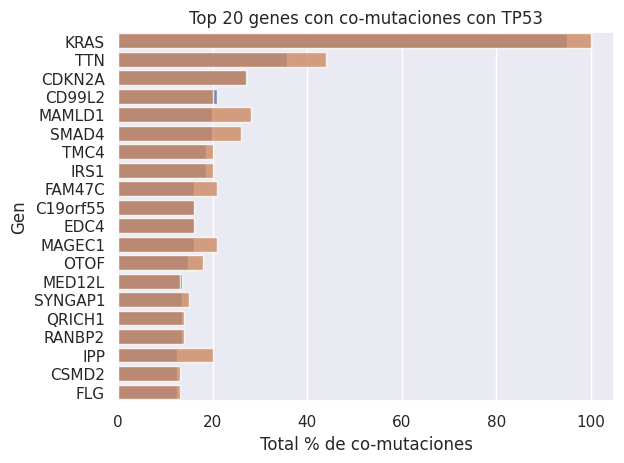

In [63]:
comutations('TP53')

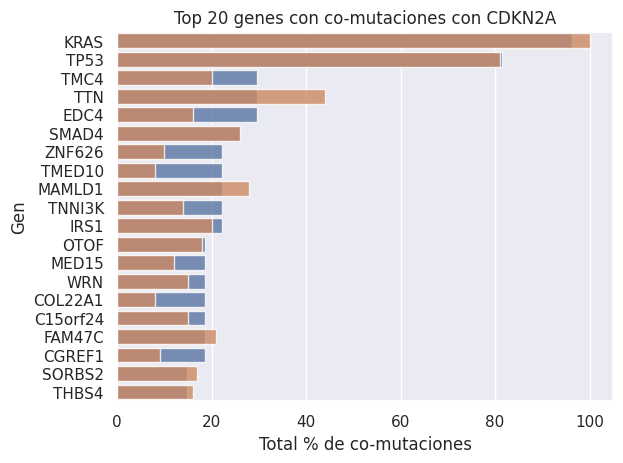

In [64]:
comutations('CDKN2A')

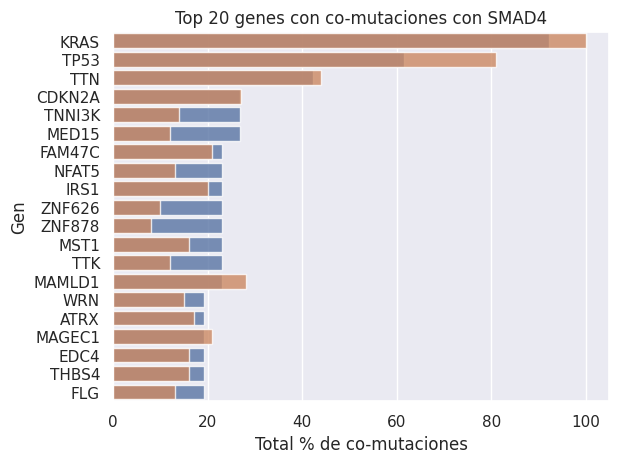

In [65]:
comutations('SMAD4')

##